In [4]:
# Importing Modules
from ultralytics import YOLO
import cv2
import numpy as np
from collections import defaultdict

# Loading Models
model = YOLO("yolov8n.pt")

# Loading Video 
cap = cv2.VideoCapture("traffic.mp4")
# cap = cv2.VideoCapture(0)

track_history = defaultdict(lambda: [])
# Read Frames
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Make detections 
        results = model.track(frame,persist=True,tracker="bytetrack.yaml",classes=[2,3,5,7])

        boxes = results[0].boxes.xywh.cpu()
        track_ids = results[0].boxes.id.int().cpu().tolist()
        annotated_frame = results[0].plot()

        for box, track_id in zip(boxes, track_ids):
            x, y, w, h = box
            track = track_history[track_id]
            track.append((float(x), float(y)))  # x, y center point
            if len(track) > 30:  # retain 90 tracks for 90 frames
                track.pop(0)

            # Draw the tracking lines
            points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
            cv2.polylines(annotated_frame, [points], isClosed=False, color=(230, 230, 230), thickness=10)
        cv2.imshow('YOLO', annotated_frame)
    
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()
print(track_history)


0: 384x640 4 cars, 131.9ms
Speed: 0.0ms preprocess, 131.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 129.6ms
Speed: 7.0ms preprocess, 129.6ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 109.7ms
Speed: 3.5ms preprocess, 109.7ms inference, 10.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 115.1ms
Speed: 1.0ms preprocess, 115.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 110.8ms
Speed: 0.0ms preprocess, 110.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 107.0ms
Speed: 9.2ms preprocess, 107.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 108.7ms
Speed: 3.0ms preprocess, 108.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 114.3ms
Speed: 4.7ms preprocess, 114.3ms inference, 2.7ms postprocess per image a

In [2]:
import pickle
pickle.dump(dict(track_history),open("track_path.pkl",'wb'))

In [2]:
# a = pickle.load(open('track_path.pkl','rb'))
import pandas as pd
k = pd.read_pickle('track_path.pkl')


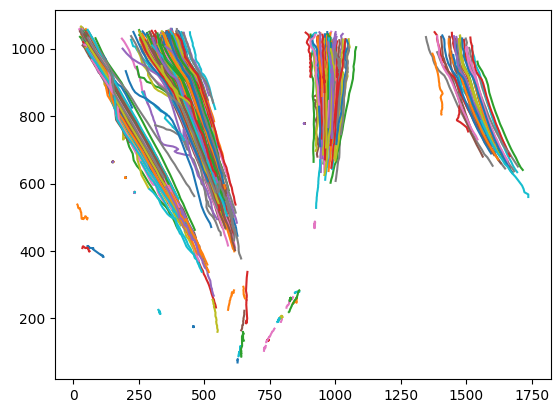

In [3]:
import matplotlib.pyplot as plt
# for data_dict in k.values():
#     print(data_dict)
#     for i in data_dict:
#         plt.plot(i[0],i[1])
# plt.legend(k.keys())
# plt.show()
for key,value in k.items():
    X = []
    Y = []
    for i in value:
        X.append(i[0])
        Y.append(i[1])
    plt.plot(X, Y,label = str(key))
# plt.legend()
plt.show()
